# Deep Learning Lab Assignment 1: Perceptron and MLP

    Ayush Abrol B20AI052

---

### Question 1 

### Implement a perceptron using the IRIS dataset. Perform backpropagation for two iterations.

In [387]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [388]:
iris_df = datasets.load_iris()
# print the shape of iris df
print(iris_df.data.shape)

(150, 4)


In [389]:
iris_df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [390]:
X = iris_df.data
y = iris_df.target

In [391]:
print(X.shape, y.shape)

(150, 4) (150,)


In [392]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

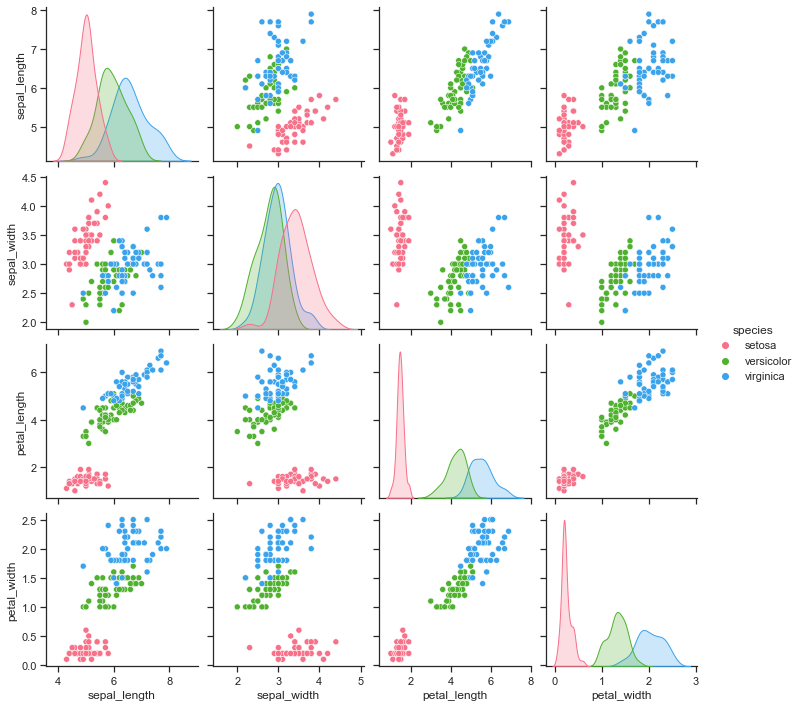

In [393]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [394]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [395]:
y_encoded = np.zeros((y.size, y.max()+1))
y_encoded[np.arange(y.size),y] = 1
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [397]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105, 3) (45, 3)


In [398]:
print(y_train)
print("-------------------------------")
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1.

In [399]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [400]:
np.random.seed(0)
weights = np.random.rand(X.shape[1], y.max()+1)
bias = np.random.rand(1, y.max()+1)

epochs = 2
for i in range(epochs):
    for j in range(X_train.shape[0]):
        # Forward pass
        
        input_layer = X_train[j] # (4,)
        input_layer = input_layer.reshape(input_layer.shape[0], 1) # (4, 1)
        output_layer = sigmoid(np.dot(weights.T, input_layer) + bias.T)  # (3, 1)

        # Calculate the error
        val = y_train[j]
        val = val.reshape(val.shape[0], 1) # (3, 1)
        # Calculate the error
        error = val - output_layer # (3, 1)
        
        sig_der = sigmoid_derivative(output_layer) # (3, 1)

        # Backward pass
        output_layer_error = sigmoid_derivative(output_layer) * error # (3, 1)

        # Update the weights and biases
        weights += np.dot(input_layer, output_layer_error.T) * 0.01 # Learning rate
        bias += np.sum(output_layer_error.T, axis=0, keepdims=True) * 0.01

    print("Epoch: ", i, "Error: ", np.mean(np.abs(error)))
    print("Weights for epoch ", i, ": ", weights)
    print("Bias for epoch ", i, ": ", bias)


Epoch:  0 Error:  0.4361331676999405
Weights for epoch  0 :  [[-0.19283407 -0.0553072  -0.11460819]
 [ 0.21205381  0.00603773  0.24888144]
 [-0.16633346  0.40309203  0.57309239]
 [ 0.17615097  0.63171545  0.42026813]]
Bias for epoch  0 :  [[ 0.45001856  0.79360948 -0.0604749 ]]
Epoch:  1 Error:  0.3343341307497836
Weights for epoch  1 :  [[-0.24538513 -0.37680903 -0.42348887]
 [ 0.2314119  -0.17280426  0.0718814 ]
 [-0.30609473  0.18488161  0.42762397]
 [ 0.1184953   0.55370288  0.38715904]]
Bias for epoch  1 :  [[ 0.44894425  0.74040678 -0.12028057]]


In [401]:
# Predict the output for the test data
predictions = []
for i in range(X_test.shape[0]):
    # Forward pass
    input_layer = X_test[i] # (4,)
    input_layer = input_layer.reshape(input_layer.shape[0], 1) # (4, 1)
    output_layer = sigmoid(np.dot(weights.T, input_layer) + bias.T)  # (3, 1)
    for j in range(output_layer.shape[0]):
        output_layer[j] = np.where(output_layer[j] == np.amax(output_layer), 1, 0)
    output_layer = output_layer.reshape([1,3]).flatten()
    predictions.append(output_layer)
predictions = np.array(predictions)

test_classes = []
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        if y_test[i][j] == 1:
            test_classes.append(j)
test_classes = np.array(test_classes)
print("Test Classes: ", test_classes)

pred_classes = []
for i in range(predictions.shape[0]):
    for j in range(predictions.shape[1]):
        if predictions[i][j] == 1:
            pred_classes.append(j)
pred_classes = np.array(pred_classes)
print("Pred CLasses: ", pred_classes)

from sklearn.metrics import accuracy_score
print("Accuracy of the Perceptron: ", accuracy_score(test_classes, pred_classes)*100, "%")


Test Classes:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Pred CLasses:  [2 0 2 2 2 0 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0 0 0 2 0 0 2 2
 0 0 0 2 2 2 0 0]
Accuracy of the Perceptron:  71.11111111111111 %


### Question 2 

### Implement an MLP using the IRIS dataset. Perform backpropagation for 15 iterations. The initial weights of the MLP should be randomly initialized. You can choose the activation function and loss function at your convenience, which gives the best performance.

### The MLP should have 2 hidden layers, one with 4 neurons and one with 5 neurons. The input layer and output layer should have 3 neurons each.

In [402]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [403]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [404]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

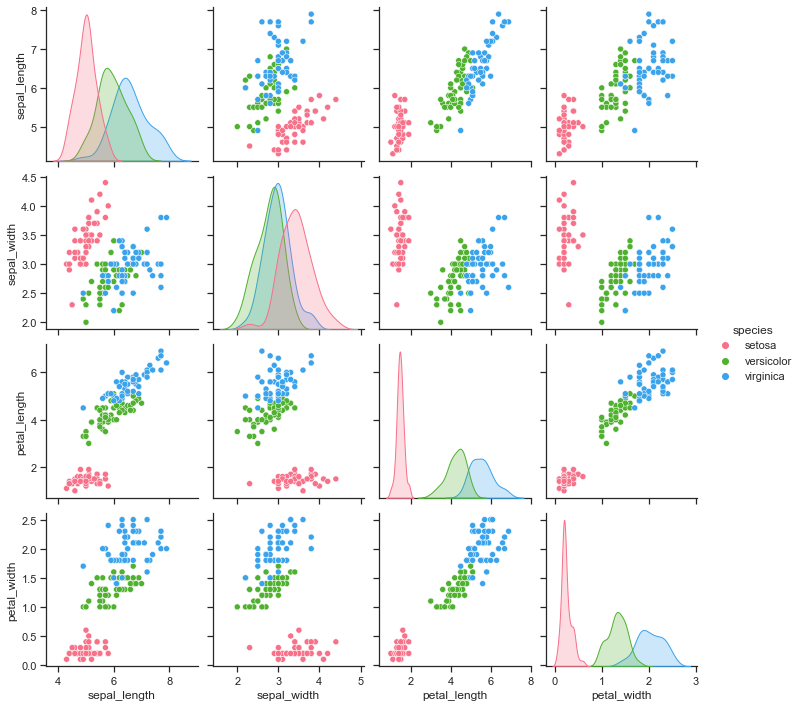

In [405]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

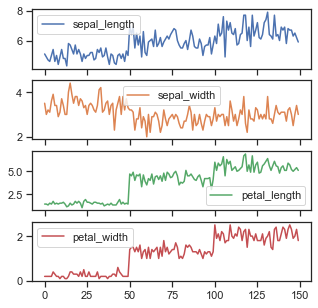

In [406]:
iris.plot(subplots=True, figsize=(5, 5))
plt.show()

In [407]:
# One hot encode the target
y_encoded = np.zeros((y.size, y.max()+1))
y_encoded[np.arange(y.size),y] = 1
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

This time we will split the data into 80:20

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [409]:
print(y_train)
print("-------------------------------")
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0.

In [410]:
class MultiLayerPerceptron:
    def __init__(self, input_layer, hidden_layer1, hidden_layer2, output_layer, learning_rate=0.1):
        
        # Initializing the weights and biases
        self.weights1 = np.random.rand(input_layer, hidden_layer1)
        self.bias1 = np.random.rand(1, hidden_layer1)
        self.weights2 = np.random.rand(hidden_layer1, hidden_layer2)
        self.bias2 = np.random.rand(1, hidden_layer2)
        self.weights3 = np.random.rand(hidden_layer2, output_layer)
        self.bias3 = np.random.rand(1, output_layer)
        self.learning_rate = learning_rate
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x)) 

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    def fit(self, X, y):     
        for j in range(X.shape[0]):
            # Forward pass
            self.input_layer = X[j].reshape(X[j].shape[0], 1) # (4, 1)
            self.output_layer1 = self.sigmoid(np.dot(self.weights1.T, self.input_layer) + self.bias1.T) # (4, 1)
            # print("Output Layer 1:", self.output_layer1)
            self.output_layer2 = self.sigmoid(np.dot(self.weights2.T, self.output_layer1) + self.bias2.T) # (5, 1)
            # print("Output Layer 2:", self.output_layer2)
            self.output_layer = self.softmax(np.dot(self.weights3.T, self.output_layer2) + self.bias3.T) # (3, 1)
            # print("Output Layer:", self.output_layer)


            # Backward pass
            val = y[j]
            val = val.reshape(val.shape[0], 1) # (3, 1)

            self.error = (val - self.output_layer) # (3, 1)
    
            self.output_layer_error = self.error # (3, 1)
            # print("Output_layer_error: ", self.output_layer_error)
            self.output_layer2_error = self.sigmoid_derivative(self.output_layer2) * np.dot(self.weights3, self.output_layer_error)  
            # print("Output_layer2_error: ", self.output_layer2_error)
            self.output_layer1_error = self.sigmoid_derivative(self.output_layer1) * np.dot(self.weights2, self.output_layer2_error) 
            
            # print("Output_layer1_error: ", self.output_layer1_error)

            # Update the weights and biases
            self.weights3 += self.learning_rate * np.dot(self.output_layer2, self.output_layer_error.T)
            self.bias3 += self.learning_rate * np.sum(self.output_layer_error, axis=0, keepdims=True) 
            self.weights2 += self.learning_rate * np.dot(self.output_layer1, self.output_layer2_error.T)
            self.bias2 += self.learning_rate * np.sum(self.output_layer2_error, axis=0, keepdims=True) 
            self.weights1 += self.learning_rate * np.dot(self.input_layer, self.output_layer1_error.T) 
            self.bias1 += self.learning_rate * np.sum(self.output_layer1_error.T, axis=0, keepdims=True) 
            

    def train(self, X, y, epochs):
        for i in range(epochs):
            self.fit(X, y)
            print("Epoch: ", i+1, "Error: ", np.mean(np.abs(self.error)))
            print("Weights for epoch ", i+1, ": ", self.weights1, self.weights2, self.weights3)
            print("Bias for epoch ", i+1, ": ", self.bias1, self.bias2, self.bias3)
        
    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            self.input_layer = X[i].reshape(X[i].shape[0], 1) # (4, 1)
            self.output_layer1 = self.sigmoid(np.dot(self.weights1.T, self.input_layer) + self.bias1.T) # (4, 1)
            # print("Output Layer 1:", self.output_layer1)
            self.output_layer2 = self.sigmoid(np.dot(self.weights2.T, self.output_layer1) + self.bias2.T) # (5, 1)
            # print("Output Layer 2:", self.output_layer2)
            self.output_layer = self.sigmoid(np.dot(self.weights3.T, self.output_layer2) + self.bias3.T) # (3, 1)
            # print("Output Layer:", self.output_layer)

            predictions.append(self.output_layer)
        return np.array(predictions)

In [411]:
# Define the number of neurons in each layer
input_layer = X_train.shape[1]
hidden_layer1 = 4
hidden_layer2 = 5
output_layer = 3
epochs = 15

# Create an instance of the MultiLayerPerceptron class
mlp = MultiLayerPerceptron(input_layer, hidden_layer1, hidden_layer2, output_layer, 0.1)

# Train the model
mlp.train(X_train, y_train, epochs)

Epoch:  1 Error:  0.4193553215903158
Weights for epoch  1 :  [[-0.22760807 -0.24652721  0.69261911  0.53419908]
 [ 0.70527915  0.90489387  0.72075836  0.38223949]
 [ 0.57778388 -0.16812079  0.56719053 -0.08020703]
 [ 0.87792381  0.42200693  0.39430823  0.19340298]] [[ 0.53676329  0.53422345  0.52180493  0.88711236  0.59738253]
 [ 0.2801703   0.36153554  0.61712868 -0.00676612  0.59440008]
 [ 0.5874003   0.13124076  0.03609869  0.25409301  0.28189129]
 [ 0.48805237  0.36004804  0.89552586  0.04178682  0.12659962]] [[0.12549415 0.1929512  0.60722897]
 [0.10414053 0.2757377  0.32361225]
 [0.78159216 0.18449884 0.78994841]
 [0.06725413 1.04171048 0.43224446]
 [0.94057079 0.68441282 0.69588658]]
Bias for epoch  1 :  [[ 0.7220241   0.41915156  0.54349378 -0.01871847]] [[-0.23710443  0.25469438 -0.14512235  0.06789682 -0.15398836]] [[0.03918779 0.28280696 0.12019656]]
Epoch:  2 Error:  0.41115063272945446
Weights for epoch  2 :  [[-0.47992731 -0.5328252   0.60365551  0.34684816]
 [ 0.56736948

In [412]:
# Predict the output for the test data
predictions = mlp.predict(X_test)

# Change the predictions to classes where the highest value is 1 and the rest are 0
predictions = np.argmax(predictions, axis=1).flatten()
print("Pred Classes: ", predictions)

test_classes = np.argmax(y_test, axis=1)
print("Test Classes: ", test_classes)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy for the MLP Classifier: ", accuracy_score(test_classes, predictions)*100, "%")

Pred Classes:  [2 1 2 2 2 1 1 2 2 1 2 1 0 1 0 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1]
Test Classes:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy for the MLP Classifier:  50.0 %


---